In [1]:
#import libraries 
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/'

In [3]:
#import cleaned gun violence data 
df = pd.read_csv(os.path.join(path,'gun_violence_data_cleaned.csv'))

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50916/2843969434.py:2: DtypeWarning: Columns (0,7,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'gun_violence_data_cleaned.csv'))


In [4]:
low_memory=False

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#create year, month, day, and name of day columns 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [7]:
#create total injuries(injuries+deaths) column 
df['total'] = df['n_killed'] + df['n_injured']

In [8]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,total
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,1,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1,1,1,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1,5,5,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1,7,0,4


In [9]:
df.corr()

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50916/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,n_killed,n_injured,latitude,longitude,n_guns_involved,year,month,monthday,weekday,total
n_killed,1.000000,0.108724,-0.078088,-0.061354,-0.019808,0.003439,0.002942,-1.293774e-03,2.345324e-02,0.478553
n_injured,0.108724,1.000000,-0.007131,0.018583,0.004027,0.005258,0.012223,-1.124162e-03,3.591043e-02,0.924884
latitude,-0.078088,-0.007131,1.000000,-0.056711,-0.001364,0.015166,0.015400,5.112769e-03,2.041231e-02,-0.035699
longitude,-0.061354,0.018583,-0.056711,1.000000,-0.016227,-0.016033,0.006509,4.506097e-03,-3.028063e-04,-0.006689
n_guns_involved,-0.019808,0.004027,-0.001364,-0.016227,1.000000,-0.028807,-0.000231,-2.063854e-03,-7.957076e-03,-0.003018
year,0.003439,0.005258,0.015166,-0.016033,-0.028807,1.000000,-0.166291,-1.165326e-03,-3.861436e-03,0.005960
month,0.002942,0.012223,0.015400,0.006509,-0.000231,-0.166291,1.000000,4.915720e-03,8.312536e-03,0.011922
monthday,-0.001294,-0.001124,0.005113,0.004506,-0.002064,-0.001165,0.004916,1.000000e+00,-2.739141e-07,-0.001488
weekday,0.023453,0.035910,0.020412,-0.000303,-0.007957,-0.003861,0.008313,-2.739141e-07,1.000000e+00,0.040691
total,0.478553,0.924884,-0.035699,-0.006689,-0.003018,0.005960,0.011922,-1.487858e-03,4.069078e-02,1.000000


In [10]:
df_sub = df[['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved', 'year', 'month', 'monthday', 'weekday', 'total']]

Text(0.5, 1.0, 'Correlation Matrix')

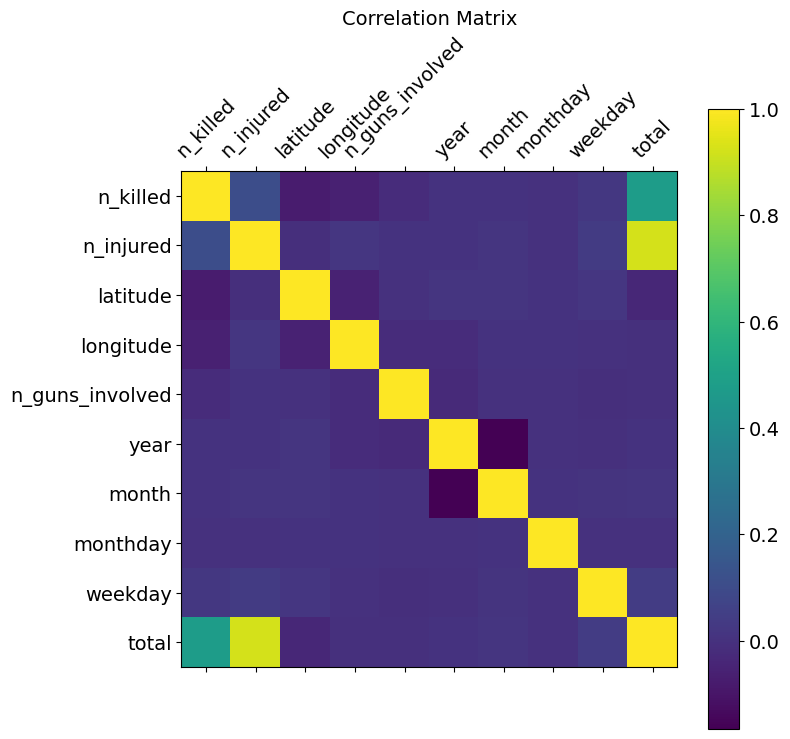

In [11]:
#create correlation matrix 
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Discuss what the coefficients in the plot mean in terms of the relationships between the variables: 

A correlation closer to +1 indicates a strong positive linear relationship between variables. A correlation close to 0 indicates little to no linear relationship between variables. A correlation coefficient close to -1 indicates a strong negative linear relationship between the variables. Just because there is correlation does not necessarily mean there is causation. 

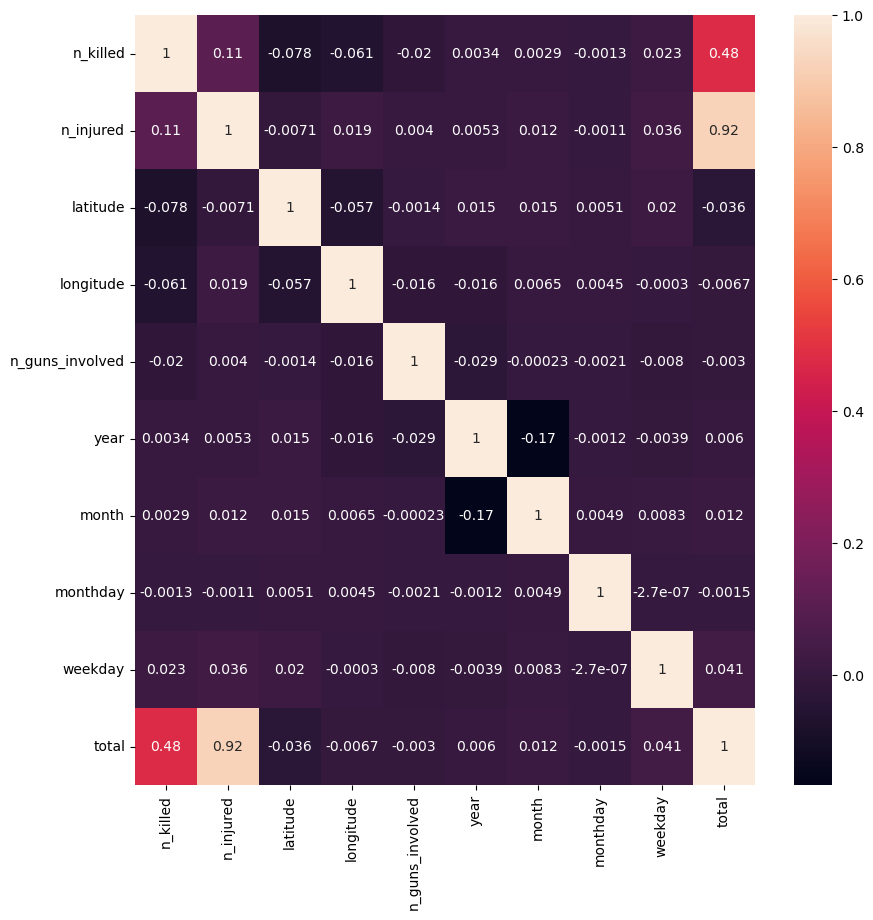

In [12]:
#create correlation heatmap 
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

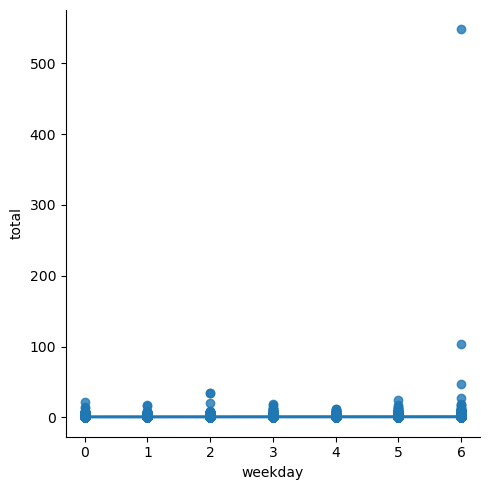

In [13]:
#create a scatterplot
sns.lmplot(x = 'weekday', y = 'total', data = df)

Discuss the output in a markdown cell: 
It appears that 6: Sunday is historically the most violent day of the week. There could be some outlier incidents that occured on Sundays that could be responsible for the dot up on the far right. 

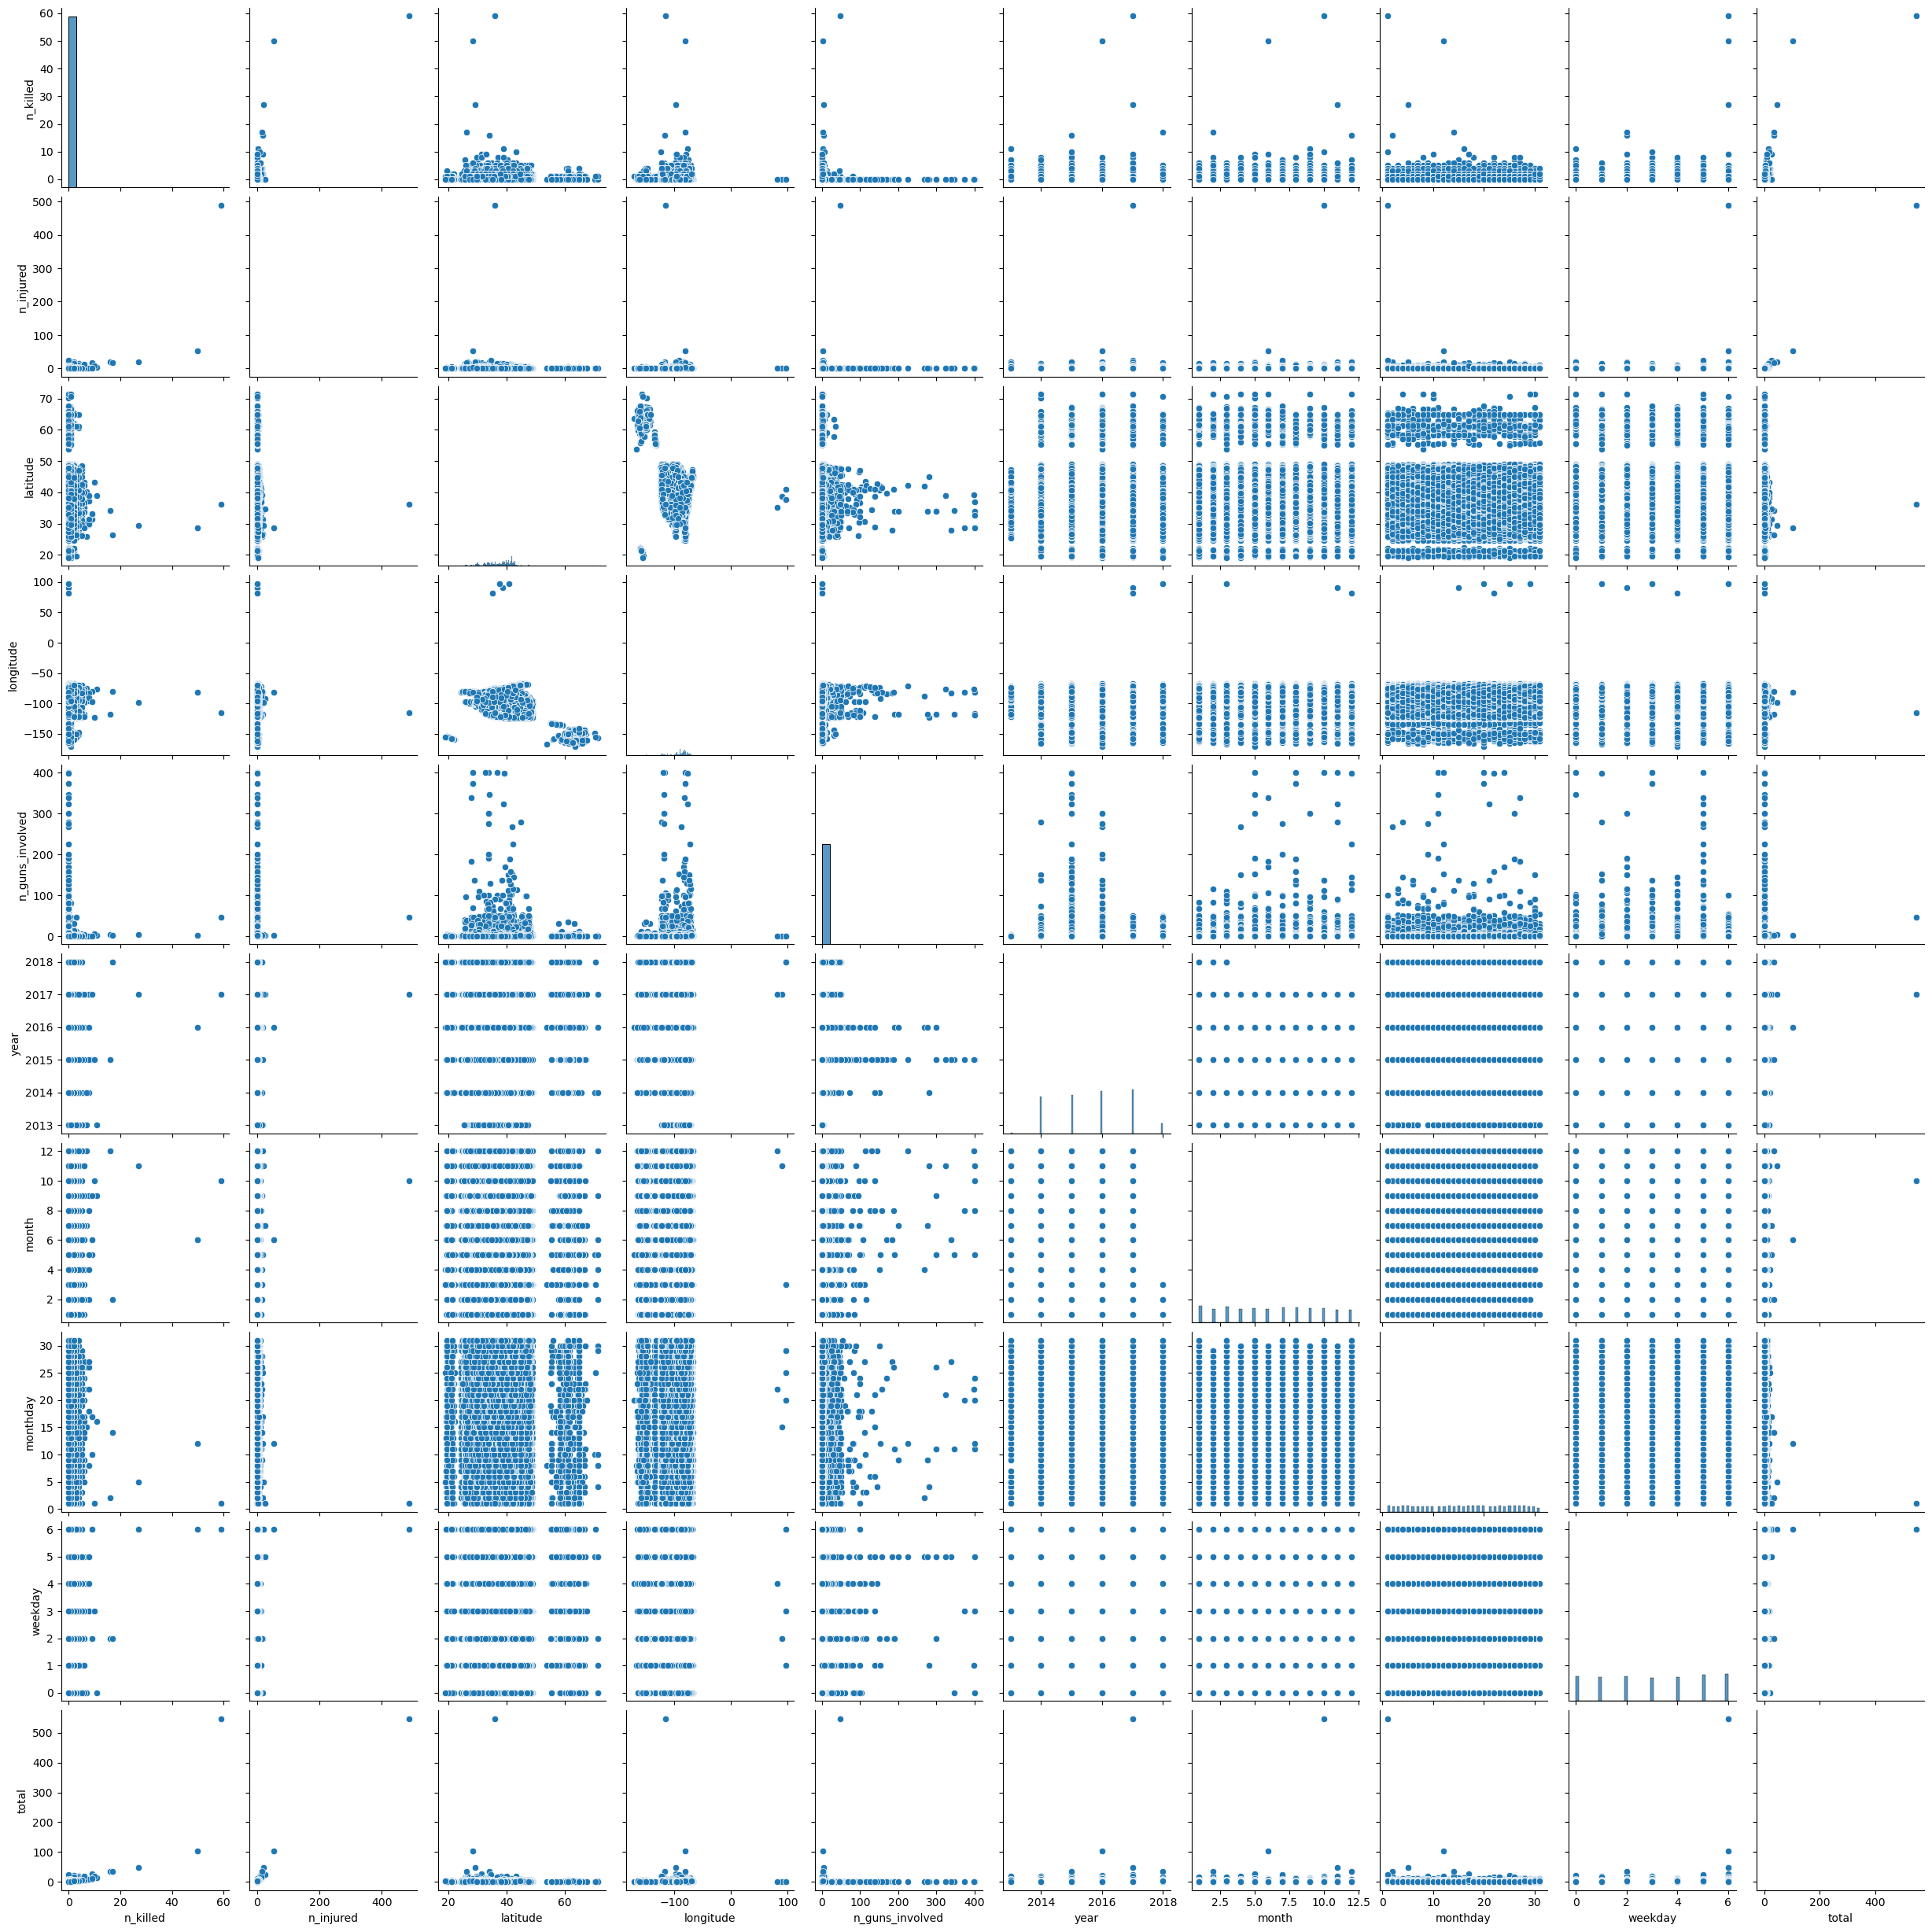

In [14]:
# Create a pair plot of entire dataset
g = sns.pairplot(df)

Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why: 

I would like to explore the correlation between number of guns involved and year because the scatterplot came out as a single bar and I would like to find out why this is. It also might be worth exploring the correlation between number of people killed/injured and number of guns involved to see if there is a higher number of injuries/deaths when there is a higher number of guns. However, according to the scatterplot, there seems to be no correlation. 

# Categorical plots

Category: Geographical region 

In [15]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
import geopandas as gpd
from shapely.geometry import Point

In [17]:
# Convert latitude and longitude to Point geometries
geometry = [Point(lon, lat) for lat, lon in zip(df['latitude'], df['longitude'])]

# Create a GeoDataFrame with points
gdf = gpd.GeoDataFrame(df, geometry=geometry)

In [18]:
#Define bounding boxes for North, South, East, and West regions
north_bbox = gpd.GeoSeries([Point(-100, 40)], crs=gdf.crs).buffer(10)
south_bbox = gpd.GeoSeries([Point(-100, 30)], crs=gdf.crs).buffer(10)
east_bbox = gpd.GeoSeries([Point(-85, 35)], crs=gdf.crs).buffer(10)
west_bbox = gpd.GeoSeries([Point(-110, 35)], crs=gdf.crs).buffer(10)

In [19]:
# Define region categories
region_categories = {
    'North': north_bbox,
    'South': south_bbox,
    'East': east_bbox,
    'West': west_bbox
}

# Function to assign region category
def assign_region_category(row):
    for category, bbox in region_categories.items():
        if row['geometry'].within(bbox.iloc[0]):
            return category
    return 'Unknown'

# Apply the function to create a new 'region_category' column
gdf['region'] = gdf.apply(assign_region_category, axis=1)

In [20]:
#view new column 
gdf.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,total,geometry,region
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,1,4,POINT (-79.85590 40.34670),East
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,1,4,POINT (-118.33300 33.90900),West
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1,1,1,4,POINT (-82.13770 41.44550),East
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1,5,5,4,POINT (-104.80200 39.65180),North
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1,7,0,4,POINT (-79.95690 36.11400),East


In [21]:
#export new wrangled data 
gdf.to_csv('gun_violence_data_wrangled.csv', index=False)

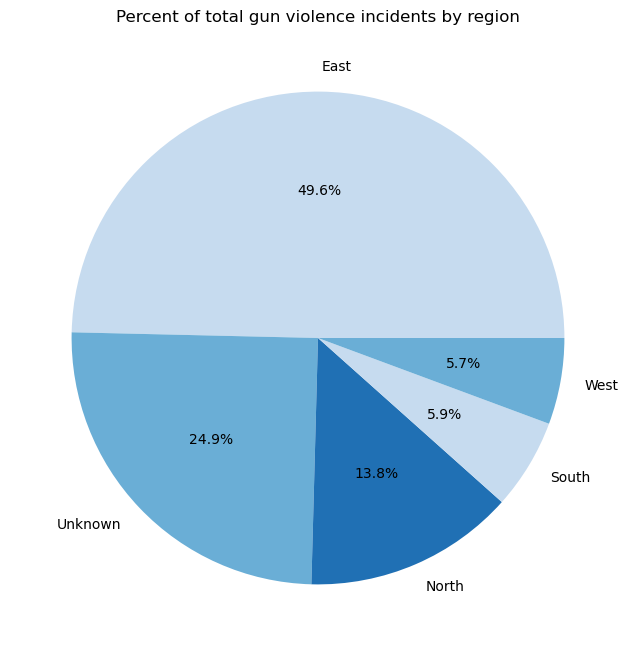

In [22]:
#Pie chart of regions 
pie_region = gdf['region'].value_counts().plot.pie(figsize = (8,8), 
                                                                      colors = sns.color_palette('Blues', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percent of total gun violence incidents by region',fontsize=12)
plt.show()

Category: Day of the week 

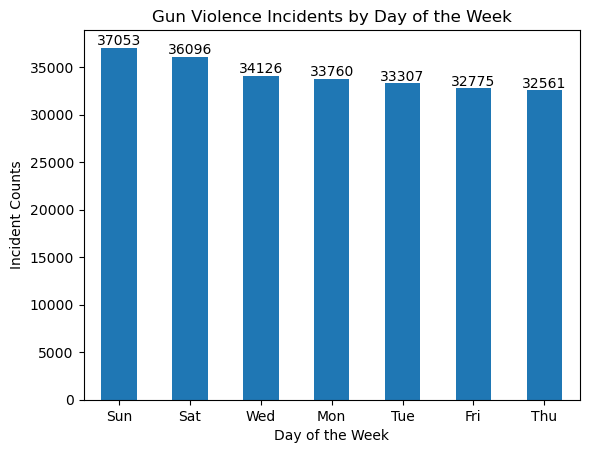

In [23]:
# Create a Series with incident counts for each day of the week
weekday_counts = df['weekday'].value_counts()

# Day of the week mapping
weekmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Create the bar chart
weekday_bar = weekday_counts.plot.bar(rot=0)

# Replace numeric x-axis labels with day of the week labels
weekday_bar.set_xticklabels([weekmap[day] for day in weekday_counts.index])

# Add count labels to each bar
for index, value in enumerate(weekday_counts):
    weekday_bar.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Incident Counts')
plt.title('Gun Violence Incidents by Day of the Week')

# Display the chart
plt.show()

Category: State 

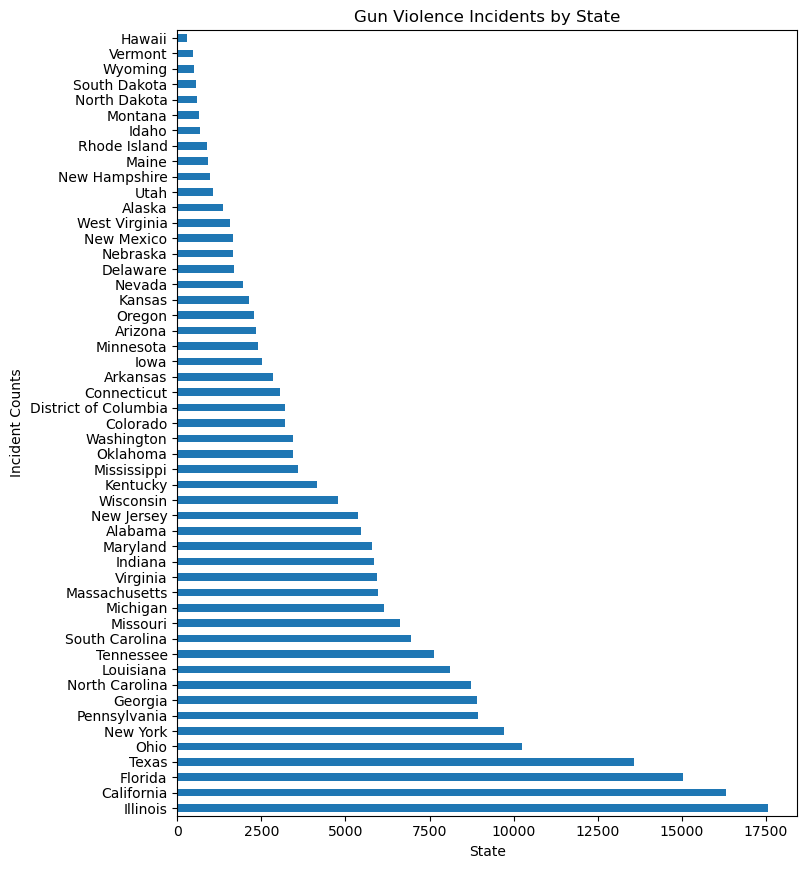

In [24]:
# Create the bar chart
state_bar = df['state'].value_counts().plot.barh(rot=0)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Incident Counts')
plt.title('Gun Violence Incidents by State')

# Increase the figure's width to add more spacing between labels
plt.gcf().set_size_inches(8, len(df['state'].unique()) * 0.2)

# Display the chart
plt.show()

Top 10 States with the most mass shootings 

*mass shootings defined by the FBI: killing of 3 or more individuals in a single incident 

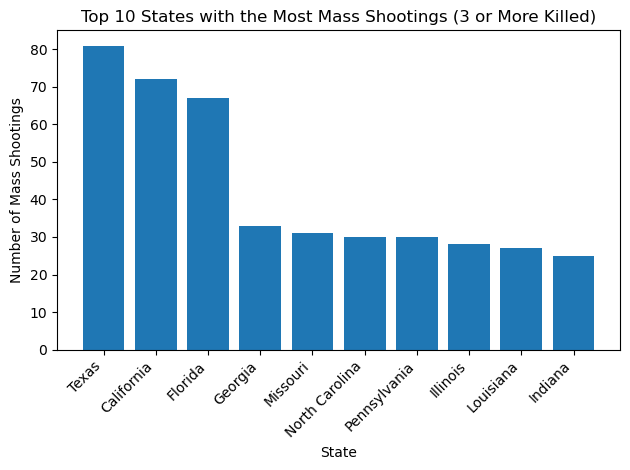

In [25]:
# Filter incidents where more than 3 or more people are killed
filtered_df = df[df['n_killed'] >= 3]

# Group by state and count occurrences, then sort by count in descending order
state_counts = filtered_df['state'].value_counts().sort_values(ascending=False)

# Get the top 10 states
top_10_states = state_counts.head(10)

# Create a bar chart
plt.bar(top_10_states.index, top_10_states.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Number of Mass Shootings')
plt.title('Top 10 States with the Most Mass Shootings (3 or More Killed)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()  # Adjust layout for labels
plt.show()

Category: City 

Top 10 cities for gun violence

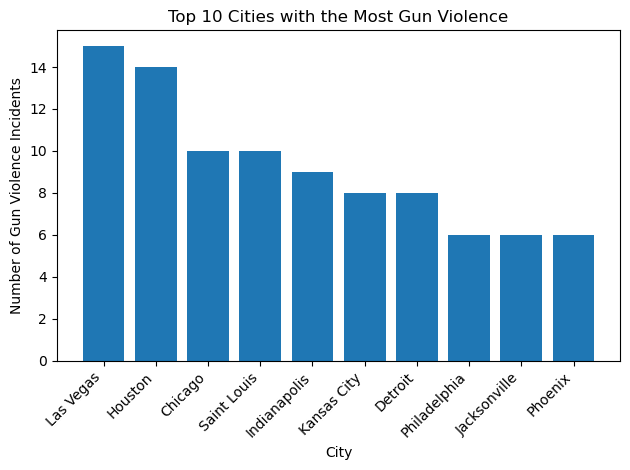

In [26]:
# Group by city and count occurrences, then sort by count in descending order
city_counts = filtered_df['city_or_county'].value_counts().sort_values(ascending=False)

# Get the top 10 cities
top_10_cities = city_counts.head(10)

# Create a bar chart
plt.bar(top_10_cities.index, top_10_cities.values)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Top 10 Cities with the Most Gun Violence')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()  # Adjust layout for labels
plt.show()

Category: Year 

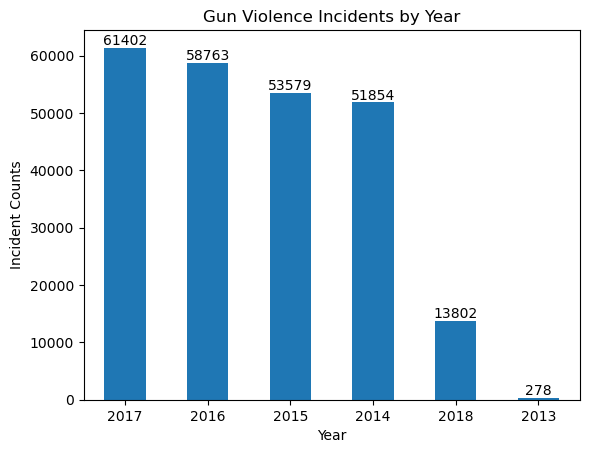

In [27]:
# Create a Series with incident counts for each day of the week
year_counts = df['year'].value_counts()

# Create the bar chart
year_bar = year_counts.plot.bar(rot=0)

# Add count labels to each bar
for index, value in enumerate(year_counts):
    year_bar.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Incident Counts')
plt.title('Gun Violence Incidents by Year')

# Display the chart
plt.show()

Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
Define any hypotheses that you can at this point. You’ll be testing these later on.

Previous questions: 

Which states have the most gun violence related deaths/injuries?
-Illinois has the most gun violence incidents 
Which cities/counties have the most gun violence related deaths/injuries?
-Las Vegas, Houston, Chicago, Saint Louis, Indianapolis
Which years have the most/least gun violence related incidents?
-2017 was the most violent year, with 61402 incidents

Some hypotheses: 

-mass shootings are more likely to occur in urban areas
-shooting suspects are more likely to be young men 